In [269]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [270]:
data = pd.read_csv("song_data.csv")

datax = data[["song_duration_ms", "danceability", "energy"]]
datax["song_duration_ms"] = (datax["song_duration_ms"] - datax["song_duration_ms"].min()) / (datax["song_duration_ms"].max() - datax["song_duration_ms"].min())
datax = datax.to_numpy()
datay = data["song_popularity"].to_numpy()
X_train, X_test, y_train, y_test = train_test_split(datax, datay, random_state=52, test_size=0.25)

print(X_test.shape)

print(y_test.shape)

(4709, 3)
(4709,)


/tmp/ipykernel_12503/1287640705.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datax["song_duration_ms"] = (datax["song_duration_ms"] - datax["song_duration_ms"].min()) / (datax["song_duration_ms"].max() - datax["song_duration_ms"].min())


In [271]:
class LinearRegression:
    def __init__(self, epochs):
        self.learning_rate = 0.001
        self.weights = np.array([np.random.rand() for i in range(0,3)])
        self.b = np.random.rand()
        self.losses = np.array([], dtype = np.float64)
        self.epochs = epochs
    
    predict = lambda self, x: np.dot(x, self.weights) + self.b

    def fit(self, x_train, y_train):
        self.y = y_train

        for e in range(self.epochs):
            for i in range(x_train.shape[0]):
                pred = self.predict(x_train[i])
                loss = (pred - self.y[i]) ** 2


            

                dw = 2 * x_train[i] * (pred - self.y[i])
                db = 2 * (pred - self.y[i])

                self.weights -= self.learning_rate * dw
                self.b -= self.learning_rate * db
                
            self.losses =  np.append(self.losses, loss)
            print(f"EPOCH = {e + 1}| LOSS = {loss}")


In [272]:
lr = LinearRegression(10)
lr.fit(X_train, y_train)

EPOCH = 1| LOSS = 172.29257768474335
EPOCH = 2| LOSS = 164.68725044670472
EPOCH = 3| LOSS = 161.129127012508
EPOCH = 4| LOSS = 159.3203417082633
EPOCH = 5| LOSS = 158.34228456669155
EPOCH = 6| LOSS = 157.79319583783322
EPOCH = 7| LOSS = 157.4808104596553
EPOCH = 8| LOSS = 157.30526039389594
EPOCH = 9| LOSS = 157.2111573351311
EPOCH = 10| LOSS = 157.16631735518817


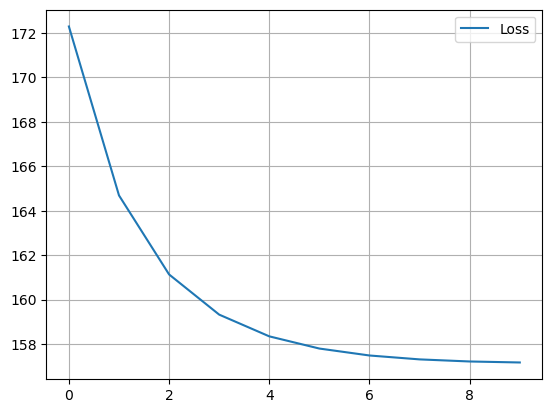

In [279]:
plt.plot(lr.losses, label = "Loss")
plt.grid()

plt.legend()
plt.show()